# Import Libraries & Define Functions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron

# 1 Concept Problems

## Problem 3c

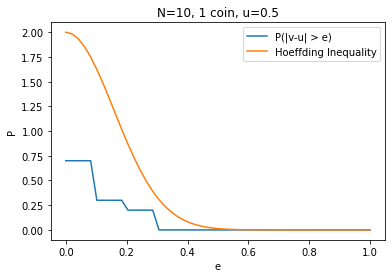

In [2]:
# initialize error, samples, and mu
err_x = np.linspace(0,1)
N = 10
mu = 0.5

# calculate hoeffding inequality
hoeffding = 2*np.exp(-2*err_x**2*N)

# calculate probabilty
k = np.random.binomial(n=N, p=mu, size=10)
P = np.abs(k/N - mu)
prob = [(P > e).mean() for e in err_x]

# plot probability and hoeffding
plt.plot(err_x, prob, label="P(|v-u| > e)")
plt.plot(err_x, hoeffding, label="Hoeffding Inequality")
plt.legend()
plt.title("N=10, 1 coin, u=0.5")
plt.xlabel("e")
plt.ylabel("P")
plt.show()

## Problem 3d

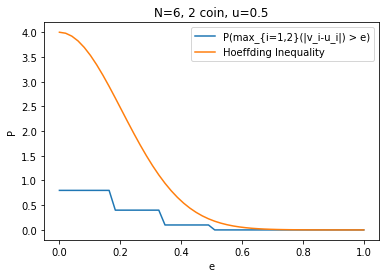

In [3]:
# initialize error, samples, and mu
err_x = np.linspace(0,1)
N = 6
mu = 0.5
coins = 2

# calculate hoeffding inequality
hoeffding = 2*coins*np.exp(-2*err_x**2*N)

# calculate probabilty
k = np.random.binomial(n=N, p=mu, size=[10, coins])
P = np.abs(k/N - mu).max(axis=1)
prob = [(P > e).mean() for e in err_x]

# plot probability and hoeffding
plt.plot(err_x, prob, label="P(max_{i=1,2}(|v_i-u_i|) > e)")
plt.plot(err_x, hoeffding, label="Hoeffding Inequality")
plt.legend()
plt.title("N=6, 2 coin, u=0.5")
plt.xlabel("e")
plt.ylabel("P")
plt.show()

# 2 Coding Problems

## Problem 1a

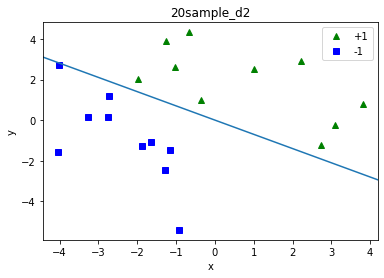

In [4]:
# load data
file = "20sample_d2.csv"
df = pd.read_csv(file, header = None)
X = df.loc[:,0:1] # the columns are unnamed
y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][y == 1],X[1][y == 1], 'g^', label='+1')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv'))
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot true target function/decision boundary
target_function = [0.1860, 0.2654, 0]
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [5]:
print("Slope:\t\t", slope)
print("Intercept:\t", intercept)
print("Target Function:", target_function[:2])
print("Bias:\t\t", target_function[2])

Slope:		 -0.7008289374529012
Intercept:	 0.0
Target Function: [0.186, 0.2654]
Bias:		 0


## Problem 1b

In [6]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X,y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 1.0


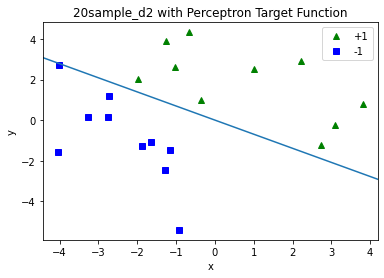

In [7]:
# plot dataset
plt.plot(X[0][y == 1],X[1][y == 1], 'g^', label='+1')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function_new = clf.coef_[0]
target_function_new = np.append(target_function_new, clf.intercept_[0])
slope_new = -target_function_new[0] / target_function_new[1]
intercept_new = target_function_new[2] / target_function_new[1]
Y_new = [slope_new * i + intercept_new for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [8]:
print("Slope:\t\t\t", slope_new)
print("Intercept:\t\t", intercept_new)
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", target_function_new[:2])
print("Bias:\t\t\t", target_function_new[2])

Slope:			 -0.6945447348855619
Intercept:		 0.0
Number of Updates:	 7
Target Function:	 [1.2985  1.86957]
Bias:			 0.0


## Problem 1c

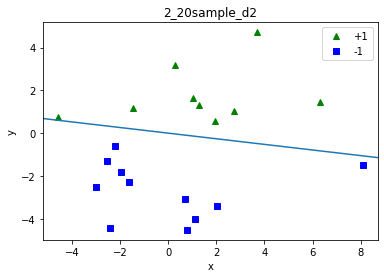

In [9]:
# load data
file = "2_20sample_d2.csv"
df = pd.read_csv(file, header = None)
X = df.loc[:,0:1] # the columns are unnamed
y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][y == 1],X[1][y == 1], 'g^', label='+1')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv'))
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot true target function/decision boundary
target_function = [0.1245, 0.9486, 0]
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [10]:
print("Slope:\t\t", slope)
print("Intercept:\t", intercept)
print("Target Function:", target_function[:2])
print("Bias:\t\t", target_function[2])

Slope:		 -0.1312460468058191
Intercept:	 0.0
Target Function: [0.1245, 0.9486]
Bias:		 0


In [11]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 1.0


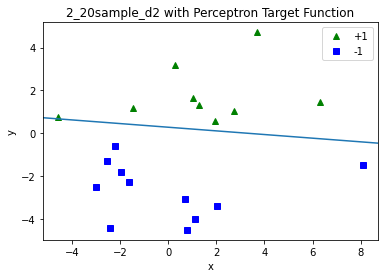

In [12]:
# plot dataset
plt.plot(X[0][y == 1],X[1][y == 1], 'g^', label='+1')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function_new = clf.coef_[0]
target_function_new = np.append(target_function_new, clf.intercept_[0])
slope_new = -target_function_new[0] / target_function_new[1]
intercept_new = target_function_new[2] / target_function_new[1]
Y_new = [slope_new * i + intercept_new for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [13]:
print("Slope:\t\t\t", slope_new)
print("Intercept:\t\t", intercept_new)
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", target_function_new[:2])
print("Bias:\t\t\t", target_function_new[2])

Slope:			 -0.08537160839102789
Intercept:		 0.2767671931239959
Number of Updates:	 9
Target Function:	 [0.61692 7.22629]
Bias:			 2.0


## Problem 1d

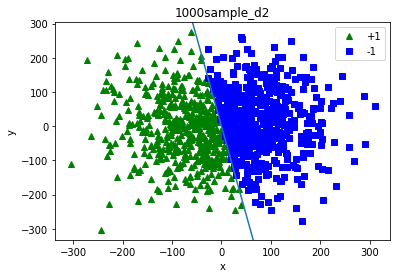

In [14]:
# load data
file = "1000sample_d2.csv"
df = pd.read_csv(file, header = None)
X = df.loc[:,0:1] # the columns are unnamed
y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][y == 1],X[1][y == 1], 'g^', label='+1')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv'))
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot true target function/decision boundary
target_function = [-0.9469, -0.1828, 0]
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [15]:
print("Slope:\t\t", slope)
print("Intercept:\t", intercept)
print("Target Function:", target_function[:2])
print("Bias:\t\t", target_function[2])

Slope:		 -5.179978118161926
Intercept:	 -0.0
Target Function: [-0.9469, -0.1828]
Bias:		 0


In [16]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 0.99


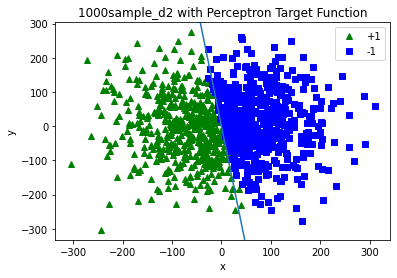

In [17]:
# plot dataset
plt.plot(X[0][y == 1],X[1][y == 1], 'g^', label='+1')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function_new = clf.coef_[0]
target_function_new = np.append(target_function_new, clf.intercept_[0])
slope_new = -target_function_new[0] / target_function_new[1]
intercept_new = target_function_new[2] / target_function_new[1]
Y_new = [slope_new * i + intercept_new for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [18]:
print("Slope:\t\t\t", slope_new)
print("Intercept:\t\t", intercept_new)
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", target_function_new[:2])
print("Bias:\t\t\t", target_function_new[2])

Slope:			 -7.065073135188623
Intercept:		 -0.02175024197144192
Number of Updates:	 16
Target Function:	 [-1299.30934  -183.906  ]
Bias:			 4.0


## Problem 1e

In [19]:
# load data
df = pd.read_csv("1000sample_d10.csv", header = None)
X = df.loc[:,0:9] # the columns are unnamed
y = df.loc[:,10]

In [20]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 0.977


In [21]:
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", clf.coef_[0])
print("Bias:\t\t\t", clf.intercept_[0])

Number of Updates:	 24
Target Function:	 [ 25.13692073  29.116954   115.4927033   22.130051   120.040915
 -50.300309   -39.9160587   30.469952     0.4267497   -0.844576  ]
Bias:			 3.0


## Problem 1f

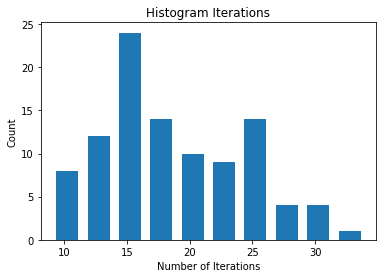

In [22]:
histogram = []
for i in range(100):
    # create Perceptron model
    clf = Perceptron(tol=1e-3, random_state=i)
    clf.fit(X, y)

    histogram.append(clf.n_iter_)

# create histogram
hist, bins = np.histogram(histogram)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Histogram Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Count")

plt.show()

## Problem 1g

See report.